In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm

draw = False

data = pd.read_csv('./data.tsv', sep='\t', index_col='PersonID')

target = data.Age
data.drop(['Age'],axis=1, inplace=True)

## Gradient Boosting

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import graphviz
from sklearn.tree import export_graphviz

f = []
y = []
mse=[]

residual = target

for iter_ in tqdm(range(50)):
    f.append(DecisionTreeRegressor(min_samples_leaf=2))
    f[-1].fit(data, residual)
    y.append(f[-1].predict(data))
    pred = np.sum(y, axis=0)
    mse.append(mean_squared_error(pred, target))
    
    if draw:
        dot_data = export_graphviz(f[-1],
                                   feature_names=data.columns,
                                   filled=True,
                                   rounded=True,
                                   out_file=None )
        graph = graphviz.Source(dot_data)
        graph.render("trees/simpletree"+str(iter_))

    residual = target - pred
    
    if(iter_ > 1 and (mse[-2] - mse[-1]) < 1e-4):
        print('early stop at iter', iter_)
        break

  0%|          | 0/50 [00:00<?, ?it/s]

early stop at iter 15


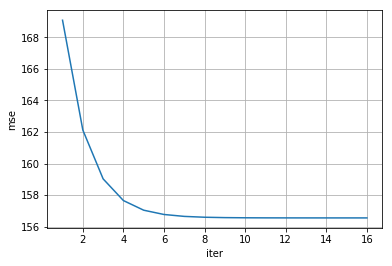

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel('iter')
plt.ylabel('mse')
plt.grid()
plt.plot(np.arange(1, len(mse)+1), mse)

## Original Algorithm

In [4]:
# F[0](data) = argmin(p) sum(L(y, p))
# for m in range(M):
#     residual = -grad( dL(y,F(data))/dF(data) )
#     a[m] = argmin(a, b) sum(residual - b*h(data, a))^2
#     p[m] = argmin(p) sum(L(y, F[m-1](data) + p*h(data, a[m])))
#     F[m] = F[m-1](data) + p[m]*h(data, a[m])
# sum(F)